<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Variables Aleatorias </h2>
    <h4> Ignacio Cea Ruiz </h4>
</center>

## Introducción
Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentaciones, artículos y papers.

> Recuerde que los laboratorios tienen una ponderación de 25% en la nota final del ramo y que, además, el promedio de estos debe ser mayor o igual a 55 para aprobar el ramo

## Reglamento
1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un Jupyter Notebook.
3. El nombre del archivo de entrega del laboratorio *i* debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) y [Type hints](https://docs.python.org/3/library/typing.html) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
7. Solo un integrante por grupo debe realizar la entrega por Aula.
8. El código entregado es solo una guía, se puede modificar sin problemas. Así mismo, para cada ejercicio usted puede crear las funciones que estime conveniente.

## Toolbox

La caja de herramientas (stack de tecnologias) para el presente laboratorio está conformada por:
1. [Python](https://www.python.org/doc/).
2. [Numpy](https://numpy.org/doc/stable/).
3. [Scipy](https://docs.scipy.org/doc/scipy/reference/index.html)
5. [Plotly](https://plotly.com/python-api-reference/).

Usted es libre de utilizar el entorno de desarrollo que prefiera, sin embargo se recomienda el uso de [Anaconda](https://www.anaconda.com/products/individual#Downloads), ya que incluye las herramientas necesarias para desarrollar los laboratorios, permite una rápida instalación de otras librerías y es compatible con una gran variedad de sistemas operativos.

Usted también es libre de usar tanto Jupyer Notebook (incluido en la instalación individual de Anaconda) como otras alternativas de desarrollo de archivos `.ipynb` tales como [Colab](https://colab.research.google.com/) o [Visual Studio Code](https://code.visualstudio.com/). En el caso de trabajar remotamente se recomienda utilizar Git para trabajar de manera exitosa y ordenada en equipo.

Las librerías se introducirán amigablemente, no se asume ningún tipo de conocimiento previo en las tecnologías presentes en nuestra toolbox salvo por Python, sin embargo, se busca promover la lectura de documentaciones de librerías.

## Experiencia



### 1. Importación de las librerías y funciones útiles

A continuación se importan algunas de las librerías que necesitaremos para el correcto desarrollo de esta experiencia. Se recomienda utilizar los aliases por defecto.

In [2]:
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff

En la siguiente celda se implementa la función `plot_scatter`, la cual le permitirá mostrar un gráfico de dispersión a través de un arreglo de `x_values` y otro de `y_values`. Usted es libre de utilizarla o no, aunque se recomienda analizarla y leer la [documentación asociada](https://plotly.com/python/line-and-scatter/#scatter-and-line-plots-with-goscatter).

In [ ]:
def plot_scatter(x_values, y_values, title=None, x_label=None, y_label=None, height=500, width=800):
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(
                    x= x_values,
                    y= y_values,
                    mode='markers',
                    name='markers')
                 )

    fig.update_xaxes(title_text=x_label)
    fig.update_yaxes(title_text=y_label)
    fig.update_layout(title_text=title, title_x=0.5)        
    fig.update_layout(height=height, width=width, template="plotly_dark")

    fig.show(renderer='notebook')

### 2. Fundamentos (**29 pts.**)

Comenzaremos conociendo las variables aleatorias de SciPy. Gran parte de lo que se desarrollará en esta sección se puede realizar sin problemas en NumPy, cada grupo es libre de utilizar la librería que más sea de su agrado en las siguientes secciones pero en esta **deben responder utilizando SciPy**.

> Se recomienda revisar la documentación:
> 1. [Distribuciones de NumPy](https://numpy.org/doc/1.16/reference/routines.random.html)
> 2. [Distribuciones de SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

Supongamos una variable aleatoria $X\sim\text{Binom}(20, 0.6)$, la cual representa el número de alumnos que aprueban el LEC 1, de entre un total de 20, donde la probabilidad de aprobar es $0.6$. Para definirla, solo hace falta hacer lo siguiente:

In [ ]:
from scipy.stats import binom
X = binom(20, 0.6)

* Tomemos una muestra de tamaño 1000 y comparemos el promedio muestral con el teórico:

In [ ]:
np.random.seed(2022) # Semilla
sample_mean = np.mean(X.rvs(size=1000))
theoretical_mean = X.mean()
print(f"La media muestral es {sample_mean}, mientras que la teórica es {theoretical_mean}.")

La media muestral es 12.022, mientras que la teórica es 12.0.


* ¿Qué importancia tiene fijar una semilla? ¿Qué hace el método `rvs`? (**5 pts.**)

**Respuesta**: Dado que se requieren generar números pseudo aleatorios, se utiliza una semilla como generador para ellos, garantizando que siempre se generen los mismos, dado esto es que se puede repetir la operación con igual resultado anterior, por otra parte el método **rvs** genera variables aleatorias utilizando el binomio generado anteriormente con un rango de 1000.

* La varianza también es fácilmente obtenible:

In [ ]:
X.var()

4.800000000000001

El método ``pmf`` (*probability mass function*) para las variables aleatorias discretas permite calcular la probabilidad de ocurrencia para cada valor en el dominio de la variable aleatoria.

In [ ]:
X.pmf(10), X.pmf(15), X.pmf(20)

(0.11714155053639005, 0.07464701952887111, 3.6561584400629733e-05)

 Para las variables aleatorias continuas el análogo es el método ``pdf`` (*probability density function*).
 >  Recuerde que la función de densidad de probabilidad **no indica una probabilidad** para un valor $x$. Para calcular probabilidades con ella se debe integrar sobre el dominio de interés.

 El método ``cdf`` (*cumulative distribution function*) permite calcular la probabilidad acumulada hasta cierto valor:

In [ ]:
X.cdf(10), X.cdf(20)

(0.24466279668360685, 1.0)

El método ``ppf`` permite calcular el valor para el cual la probabilidad acumulada toma un cierto valor, es decir, es la inversa de la función de probabilidad acumulada.

In [ ]:
X.ppf(1)

20.0

#### 2.1 Problemas

**A)** Suponga que el número de conductores que viajan entre un punto de origen y uno de destino particulares durante un periodo de tiempo designado tiene una distribución de Poisson $Y$ con parámetro $\mu=20$. ¿Cuál es la probabilidad de que el número de conductores (**8 pts.**)
1. Sea a lo más 10?
2. Exceda los 20?
3. Esté entre 10 y 20, inclusive? Esté estrictamente entre 10 y 20?
4. Esté entre 2 desviaciones estándar del valor medio?

In [ ]:
from scipy.stats import poisson
p_1=sum([poisson.pmf(x,20) for x in range(11)])
print(p_1)
p_2=1-sum([poisson.pmf(x,20) for x in range(21)])
print(p_2)
p_3_a=sum([poisson.pmf(x,20) for x in range(10,21)])
print(p_3_a)
p_3_b=sum([poisson.pmf(x,20) for x in range(11,20)])
print(p_3_b)
p_4_inferior=poisson.stats(20, moments='m')-2*(poisson.stats(20, moments='v'))**(1/2)
p_4_superior=poisson.stats(20, moments='m')+2*(poisson.stats(20, moments='v'))**(1/2)
p_4=sum([poisson.pmf(x,20) for x in range(round(p_4_inferior),round(p_4_superior))])
print(p_4_inferior,round(p_4_inferior))
print(p_4_superior,round(p_4_superior))
print(p_4)

0.010811718826652699
0.44090741576867676
0.5540971719230157
0.45944554801258575
11.05572809000084 11
28.94427190999916 29
0.9548547592793336


5. Genere una muestra de 1000 datos desde $Y$, calcule la media muestral y compárela con la media teórica. (**2 pts.**)

In [ ]:
np.random.seed(2022)
p_5 = poisson.rvs(20, size=1000)
media_muestral= sum(p_5)/len(p_5)
print("Media muestral: ",media_muestral)
media_teorica=poisson.stats(20, moments='m')
print("Media teórica: ", media_teorica)

Media muestral:  20.066
Media teórica:  20.0


6. Grafique la distribución de probabilidad de $Y$ desde 0 hasta 100. (*Hint*: La función `plot_scatter` puede ser de ayuda) (**2 pts.**)

In [12]:
import matplotlib.pyplot as plt

lista = []
#print(np.array([1,2,3,4,5]))
lista2 = []
for i in range(0,101):
  lista.append(poisson.pmf(20,i))
  lista2.append(i)
Y = np.array(lista)
X = np.array(lista2)

plt.scatter(X,Y)
#plt.scatter(X,Y, s = )
plt.show();
    
    

NameError: name 'poisson' is not defined

7. Grafique la distribución de probabilidad acumulada de $Y$ desde 0 hasta 100. (**2 pts.**)

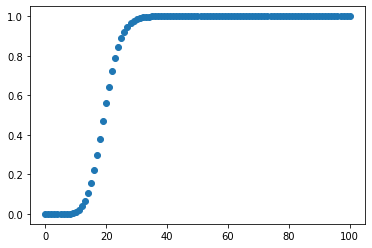

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

lista = []
#print(np.array([1,2,3,4,5]))
lista2 = []
for i in range(0,101):
  lista.append(poisson.cdf(i,20))
  lista2.append(i)
Y = np.array(lista)
X = np.array(lista2)

plt.scatter(X,Y)
#plt.scatter(X,Y, s = )
plt.show();

**B)** Suponga que existe una variable aleatoria $T\sim N(40,5)$, la cual modela la temperatura de un procesador en grados Celsius.

1. ¿Cuál es la probabilidad de que $T$ tome valores entre 45[°C] y 50[°C]? (**2 pts.**)  
Ocupamos la probabilidad en el intervalo \[a,b\], lo cual sigue la siguiente fórmula:  
$P(a \le X \leq b) = F(b)-F(a) = Φ(\frac{b-μ}{σ}) - Φ(\frac{a-μ}{σ})$  
Donde la funcion $Φ$ es la probabilidad de la variable Z en la distribución normal estandar $T\sim N(0,1)$, donde $Z=\frac{X-μ}{σ}$, siguiendo con esto, tomamos $a=45$, $b=50$, $μ=40$ y $σ=5$, entonces la probabilidad nos queda de la siguiente manera:  
⇒ $P(45 \le T \leq 50) = F(50)-F(45) = Φ(\frac{50-40}{5}) - Φ(\frac{45-40}{5})$  
⇒ $Φ(2) - Φ(1) = 0.977 - 0.841 = 0.136$  
Así, la probabilidad de que $T$ tome valores entre 45[°C] y 50[°C] es del 13.6\%.

In [4]:
from scipy.stats import norm

2. Genere una muestra de 10000 datos desde $T$, calcule la media muestral y compárela con la media teórica. (**2 pts.**)

In [9]:
np.random.seed(2022)
p_5 = norm.rvs(40,5,size=10000)
print(p_5)
media_muestral= sum(p_5)/len(p_5)
print("Media muestral: ",media_muestral)
media_teorica=norm.stats(40,5, moments='m')
print("Media teórica: ", media_teorica)

[39.9973605  38.62549288 39.30357219 ... 41.55546995 40.34955216
 38.77472458]
Media muestral:  40.009868686352235
Media teórica:  40.0


3. Grafique la distribución de probabilidad de $T$ entre 10 y 70. (**3 pts.**)

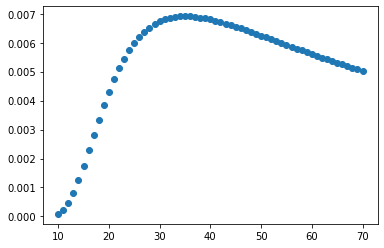

In [16]:
import matplotlib.pyplot as plt

lista = []
lista2 = []
for i in range(10,71):
  lista.append(norm.pdf(40,5,i))
  lista2.append(i)
Y = np.array(lista)
X = np.array(lista2)

plt.scatter(X,Y)
plt.show();

4. Grafique la distribución de probabilidad acumulada de $T$ entre 10 y 70. (**3 pts.**)

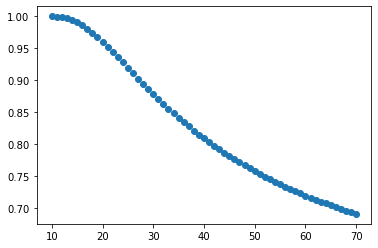

In [17]:
import matplotlib.pyplot as plt

lista = []
lista2 = []
for i in range(10,71):
  lista.append(norm.cdf(40,5,i))
  lista2.append(i)
Y = np.array(lista)
X = np.array(lista2)

plt.scatter(X,Y)
plt.show();


### 3. Generando ruido gaussiano (**32 pts.**)

Una propiedad interesante de las variables aleatorias es que estas pueden ser *transformadas*. De esta forma, podemos tomar los valores de una distribución dada y llegar a otra a través de ciertas operaciones algebraicas.

En el siguiente problema, usted explorará cómo generar valores aleatorios normalmente distribuidos (*ruido gaussiano*) a partir de una distribución uniforme.

El [método Box-Muller](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) nos ayudará en nuestra tarea. Sean $U$ y $V$ dos variables aleatorias uniformemente distribuidas en $]0,1[$. Luego, las siguientes variables aleatorias $X$ e $Y$:
$
\begin{equation}
X=\sqrt{-2\ln{U}}\cos{(2\pi V)}, \ \ \ \ Y=\sqrt{-2\ln{U}}\sin{(2\pi V)}
\end{equation}
$
Tendrán ambas una distribución normal estándar, además de ser independientes entre sí.

1. Desarrolle una función que tome dos valores `u` y `v` uniformemente distribuidos y retorne dos valores estándar-normalmente distribuidos `x` e `y`. (**5 pts.**)

In [ ]:
def boxMuller(u: float, v: float):
    x = ...
    y = ...
    return x, y

2. Genere dos *numpy array* con 10000 valores uniformemente distribuidos en $]0,1[$. Investigue **cómo aplicar la función que desarrolló en el ítem anterior de forma *vectorizada***, de forma que tome los valores de cada numpy array y genere así dos arreglos `X` e `Y` de valores estándar-normalmente distribuidos. Luego, asegúrese de concatenar ambos arreglos para obtener uno solo. (**6 pts.**)

In [ ]:
from scipy.stats import uniform

3. Grafique un histograma del arreglo final de valores estándar-normalmente distribuidos, colocando sobre él la curva que representa la pdf de una distribución normal estándar (grafique ambas cosas en el mismo plot). *Hint*: La función `create_distplot` de la libería `plotly.figure_factory` puede ser de ayuda. (**15 pts.**)

4. ¿Qué transformación debería aplicar para obtener una variable aleatoria $W$ con valores normalmente distribuidos con media $\mu=10$ y desviación estándar $\sigma=2.5$? Escriba la transformación en $\LaTeX$, desarrolle la función correspondiente, vectorícela y transforme los valores obtenidos en el ítem 2. ¿Su media y desviación estándar se aproximan a los valores esperados? (**6 pts.**)

$
\begin{equation}
W=
\end{equation}
$

### 4. Fiestas Patrias *TikiTikiTí!* (**39 pts.**)

Como habrá podido aprender en clases, la distribución de Poisson se utiliza principalmente para modelar la ocurrencia de eventos en intervalos de tiempo dados, a partir de una *tasa media de llegadas* (el parámetro $\lambda$ o $\mu$, dependiendo de la bibliografía). A continuación, analizaremos cómo esta distribución puede utilizarse para modelar el tráfico en una autopista, específicamente los posibles tacos generados en el famoso peaje Angostura, durante estas fiestas patrias. Además, introduciremos cómo la distribución exponencial puede utilizarse para modelar el tiempo de un servicio.

<center>
    <img src="https://media.biobiochile.cl/wp-content/uploads/2019/07/peaje-nueva-angostura-viajar-rapido-al-sur-de-chile-2.jpeg" style="width:40%">
</center>

Suponga que las llegadas de vehículos al Peaje Angostura es modelada como una variable aleatoria $L\sim\text{Poisson}(\lambda)$. Suponga, además, que el tiempo de atención en el peaje (tiempo de servicio) es modelado con una variable aleatoria $S\sim\text{Exp}(\mu)$

1. Si $\lambda$ es la tasa media de llegadas y se sabe que atravesarán el portal 60 mil y 70 mil vehículos los días jueves 15 y viernes 16 de septiembre, respectivamente; modele mediante dos variables aleatorias, `L1` y `L2`, las llegadas de vehículos al peaje cada día (considere que un día tiene 24 horas y usted querrá obtener una tasa de llegadas en vehículos/minuto). Luego, complete la función `double_scatter`, que le permitirá mostrar en un mismo gráfico los puntos de las pmf correspondientes. (**6 pts.**)

In [ ]:
from scipy.stats import poisson
mu_jueves=60000
mu_viernes=70000
L1 = poisson.rvs(mu_jueves)
L2 = poisson.rvs(mu_viernes)

def double_scatter(random_variable1, random_variable2, title=None, x_label=None, y_label=None, height=500, width=800):
    x_values = [1,2,3,4,5]
    y_values1 = random_variable1
    y_values2 = random_variable2
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x_values, y=y_values1, mode='markers', name="pmf de VA 1"))
    fig.add_trace(go.Scatter(x=x_values, y=y_values2, mode='markers', name="pmf de VA 2"))
    
    fig.update_xaxes(title_text=x_label)
    fig.update_yaxes(title_text=y_label)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_layout(height=height, width=width, template="plotly_dark")
    fig.show(renderer='notebook')

double_scatter(L1,L2)

ValueError: ignored

* De acuerdo a lo observado en el gráfico, ¿cuál es la probabilidad de que lleguen 40 autos al peaje en un intervalo de 1 minuto dado el viernes 16? (**2 pts.**)

* ¿Qué puede concluir de las diferencias observadas entre ambas curvas? (**2 pts.**)

2. La variable aleatoria `S`, la cual tiene un comportamiento exponencial con parámetro $\mu$, representa el tiempo que se tardará una caja en atender a un cliente. $\mu\approx$ 4 clientes por minuto. La cola crecerá infinitamente a menos que $\lambda < k\cdot\mu$, es decir, la cantidad $k$ de cajas abiertas en el peaje debe ser tal que la suma de las tasas de servicio de cada una sea mayor a la tasa de llegada de nuevos vehículos. ¿Qué valor debe tener $k$ el día jueves 15?, ¿y el día viernes 16? (**5 pts.**)

3. El tiempo total que un vehículo pasará en el peaje, es decir, la suma del tiempo que pasará haciendo cola más el tiempo que pasará siendo atendido queda modelado como:
$
\begin{equation}
\text{Tiempo en el Peaje}\sim\text{Exponencial}(k\cdot\mu-\lambda)
\end{equation}
$
* De acuerdo a lo anterior, defina las variables aleatorias `T1` y `T2`, las cuales representan el tiempo total pasado en el peaje los días jueves 15 y viernes 16, respectivamente, y grafique sus cdf completando la función `double_scatter_cdf`. (**8 pts.**)

In [ ]:
from scipy.stats import expon

T1 = expon(scale = 1 / "inserte parámetro")
T2 = expon(scale = 1 / "inserte parámetro")

def double_scatter_cdf(random_variable1, random_variable2, title=None, x_label=None, y_label=None, height=500, width=800):
    x_values = ...
    y_values1 = ...
    y_values2 = ...
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=x_values, y=y_values1, name="cdf de VA 1"))
    fig.add_trace(go.Scatter(x=x_values, y=y_values2, name="cdf de VA 2"))
    
    fig.update_xaxes(title_text=x_label)
    fig.update_yaxes(title_text=y_label)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_layout(height=height, width=width, template="plotly_dark")
    fig.show(renderer='notebook')

double_scatter_cdf(...)

4. Se ha implementado el nuevo sistema *Free Flow* en el peaje, el cual permite a los vehículos cruzar el peaje sin detenerse, siendo cobrados a través del sistema TAG. Modelemos ahora la velocidad (en metros por segundo) a la cual un vehículo cruza el peaje como una nueva variable aleatoria $V\sim\mathcal{N}(\mu, \sigma^2)$, siendo $\mu=27.8$ y $\sigma=5.6$

In [ ]:
from scipy.stats import norm
V = norm(loc=27.8, scale=5.6)

* Supongamos que la porción *Free Flow* del peaje en una dirección es de solo dos vías, que el 80% de las llegadas al peaje utilizarán dichas vías y que si dos autos consecutivos dados viajan a menos de 80 kilómetros por hora (*ojo con las unidades*), se producirá una congestión menor. Con eso en mente, haremos dos simulaciones, para los días 15 y 16 de septiembre, respectivamente: (**16 pts.**)
    1. Un día tiene 1440 minutos, por lo tanto se le pide extraer 1440 muestras aleatorias desde la variable `L1` (llegadas en cada minuto del día).
    2. Por el número $k$ indicado en cada muestra (menos el 20%), guarde en un arreglo $k$ velocidades extraídas al azar desde la variable aleatoria `V`. Asegúrese de ir concatenando los arreglos, de forma que se guarden todas las velocidades de llegada en un solo arreglo.
    3. Cuente cuántas veces ocurre que dos vehículos consecutivos (velocidades consecutivas en el arreglo) viajan a menos de 80 kilómetros por hora, provocando una congestión menor, versus el total de pares consecutivos posibles y obtenga así la probabilidad empírica de que ocurra una congestión.
    4. Repita con la variable `L2`.